In [1]:
#importing required packages
import numpy as np
from cv2 import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io as sk
import time

from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed  # using watershed algorithm for segmentation
from scipy import ndimage

In [2]:
def show(img):
  plt.imshow(img)
  plt.show()

(469, 626, 3)


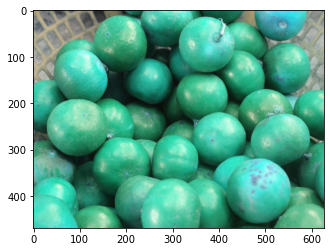

In [3]:
#Loading the image
fp = "lemon7.JPG"
img = cv2.imread(fp)
plt.imshow(img)
print(img.shape)

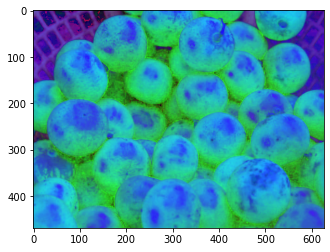

In [4]:
#converting to HSV color model
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv)

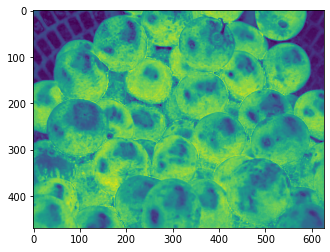

In [5]:
h, s, v = cv2.split(hsv)
show(s)

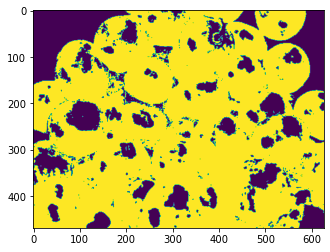

In [6]:
_, thr = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(thr)

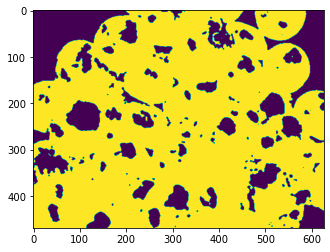

In [7]:
#blurring the image
blur = cv2.medianBlur(thr, 5)
show(blur)

### finding contours

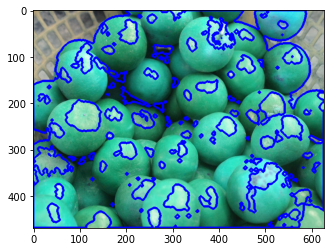

number of lemons found including error =  143
Seconds taken for prediction: 0.1999831199645996


In [8]:
start = time.time()
copy1 = img.copy()
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copy1, contours, -1, (0,0,255), 3)
show(copy1)
print("number of lemons found including error = ", len(contours))
end = time.time()
print ("Seconds taken for prediction: {}".format(end - start))